In [5]:
# Apriori

# Data Preprocessing
install.packages('arules')
library(arules)



Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

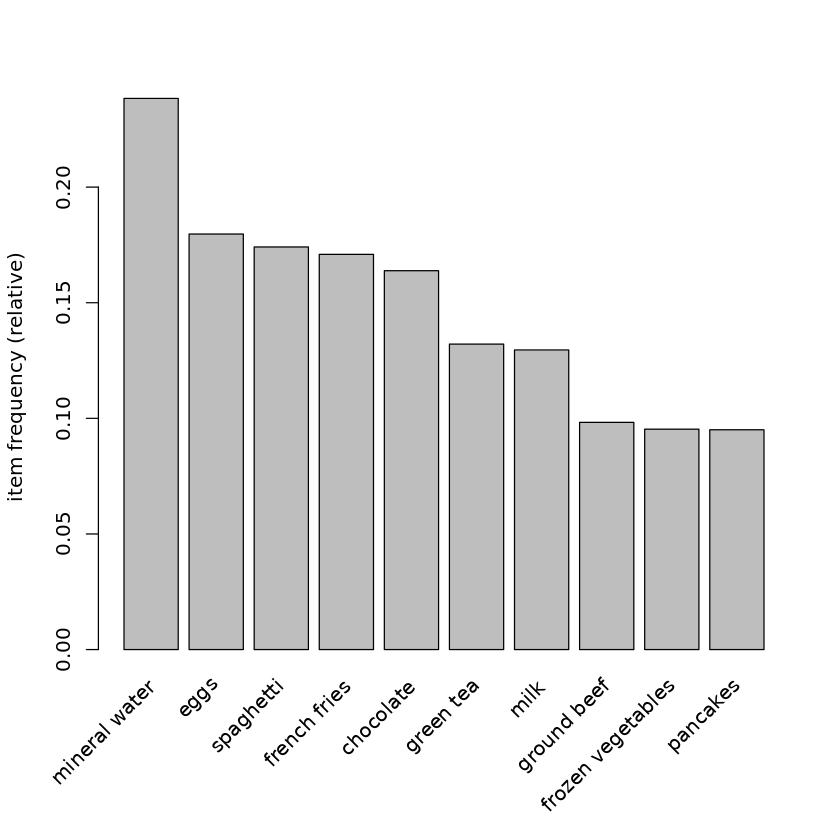

In [7]:
dataset = read.csv('Market_Basket_Optimisation.csv', header = FALSE)
dataset = read.transactions('Market_Basket_Optimisation.csv', sep = ',', rm.duplicates = TRUE)
summary(dataset)
itemFrequencyPlot(dataset, topN = 10)




In [8]:
# Training Apriori on the dataset
rules = apriori(data = dataset, parameter = list(support = 0.004, confidence = 0.2))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [811 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [9]:


# Visualising the results
inspect(sort(rules, by = 'lift')[1:10])

     lhs                       rhs                 support confidence     lift count
[1]  {light cream}          => {chicken}       0.004532729  0.2905983 4.843951    34
[2]  {pasta}                => {escalope}      0.005865885  0.3728814 4.700812    44
[3]  {pasta}                => {shrimp}        0.005065991  0.3220339 4.506672    38
[4]  {eggs,                                                                         
      ground beef}          => {herb & pepper} 0.004132782  0.2066667 4.178455    31
[5]  {whole wheat pasta}    => {olive oil}     0.007998933  0.2714932 4.122410    60
[6]  {herb & pepper,                                                                
      spaghetti}            => {ground beef}   0.006399147  0.3934426 4.004360    48
[7]  {herb & pepper,                                                                
      mineral water}        => {ground beef}   0.006665778  0.3906250 3.975683    50
[8]  {tomato sauce}         => {ground beef}   0.005332622  0.377

In [ ]:
# If we keep the LHS & RHS next to each other . We should experience increased sales .